In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Import and load dataset
data = pd.read_json('/content/drive/MyDrive/fashion_products_data.ldjson',lines=True)

# 2. Data exploration: Features, column names, info, statistics, null values
print("="*50)
print("Columns in the Dataset:")
print(data.columns)
print("="*50)

print("Dataset Info:")
print(data.info())
print("="*50)

print("Statistical Summary (Numerical Data):")
print(data.describe())
print("="*50)

print("Null Values in Each Column:")
print(data.isnull().sum())
print("="*50)
for col in data.select_dtypes(include='object').columns:
    print(f"{col}")
    print(data[col].apply(type).value_counts())
print("="*50)
# 3. Drop unnecessary columns and retain selected features
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand','uniq_id']
data = data[columns_to_keep]

print("Dataset after Retaining Selected Features:")
print(data.head())
print("="*50)


Columns in the Dataset:
Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id       

In [ ]:
print(data['brand'].isna().sum())
print(data[data['brand'].isna()])


8143
             asin                                        product_url  \
1      B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
3      B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4      B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   
7      B07PJ5QWZ3  https://www.amazon.in/Pepe-Jeans-Regular-Casua...   
11     B07DWG6KYY  https://www.amazon.in/Puma-Unisex-Regular-T-Sh...   
...           ...                                                ...   
29987  B07GCDNHL5  https://www.amazon.in/Proline-Printed-Regular-...   
29990  B07L4Y58JT  https://www.amazon.in/United-Colors-Benetton-B...   
29992  B07P9W58N8  https://www.amazon.in/Amazon-Brand-Symbol-T-Sh...   
29995  B07FVRMFTX  https://www.amazon.in/Indian-Virasat-Pushp-Cha...   
29997  B07SSLSR9X  https://www.amazon.in/Peter-England-Striped-Re...   

                                            product_name  sales_price  rating  \
1      Sf Jeans By Pantaloons Men's Plain Slim fi

asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
uniq_id             0
dtype: int64


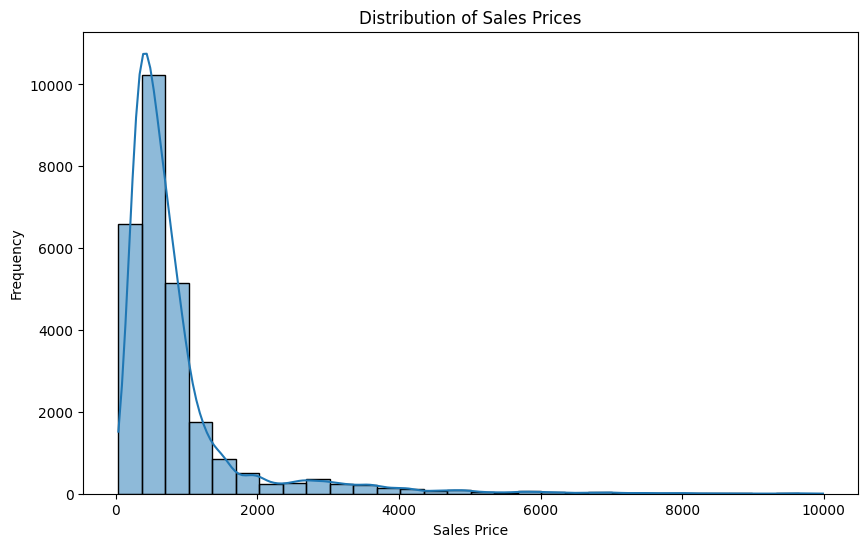

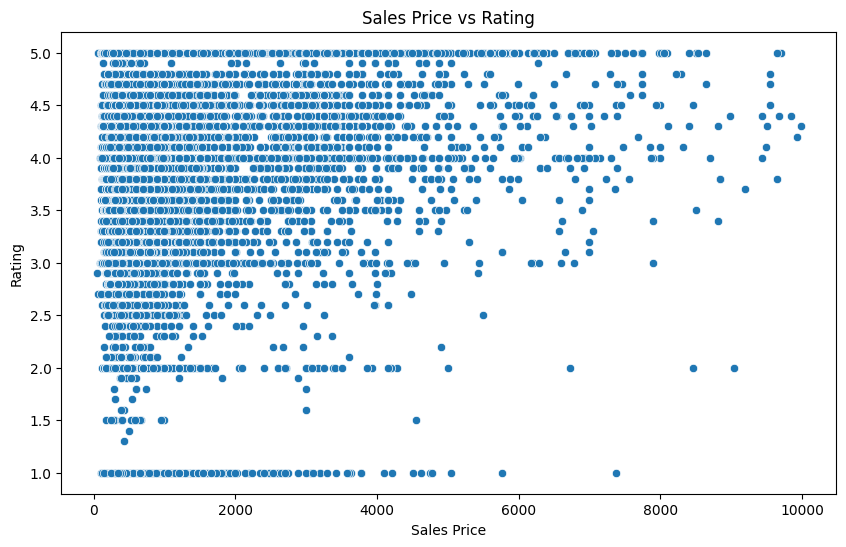

In [ ]:
# 4. Check the nullvalues is present or not and handling null values and also remove duplicates also include visualization
print(data.isnull().sum())
data = data.fillna('')
data = data.drop_duplicates()
data['sales_price'] = pd.to_numeric(data['sales_price'], errors='coerce')
#Visualisations
plt.figure(figsize=(10, 6))
sns.histplot(data['sales_price'], bins=30, kde=True)
plt.title('Distribution of Sales Prices')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Sales Price vs Rating')
plt.xlabel('Sales Price')
plt.ylabel('Rating')
plt.show()


In [ ]:

# 5. Remove and handle outliers
# Assuming that sales price has outliers
Q1 = data['sales_price'].quantile(0.25)
Q3 = data['sales_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
data = data[(data['sales_price'] >= lower_bound) & (data['sales_price'] <= upper_bound)]



In [ ]:
# 6. Sort the rows based on the product name like alphabetical order for better recommendation
data = data.sort_values(by=['product_name'])



In [ ]:
# 7. make fucntion to remove special and no english words, remove stopwords
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

def preprocess_text( text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

data['product_name'] = data['product_name'].apply(preprocess_text)
data['meta_keywords'] = data['meta_keywords'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 8. Convert shorter forms to longer forms (example)
def expand_abbreviations(text):
    abbreviations = {
        "w/": "with",
        "b/c": "because",
        "etc.": "et cetera",
        # Add more abbreviations as needed
    }
    for abbr, full in abbreviations.items():
        text = text.replace(abbr, full)
    return text

data['product_name'] = data['product_name'].apply(expand_abbreviations)





In [ ]:
# 9. Stemming function using NLTK
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

data['product_name'] = data['product_name'].apply(stem_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the combined text
X_tfidf = vectorizer.fit_transform(data['product_name'])

# Function to recommend products
def recommend_products(product_id, num_recommendations, vectors):
    # Get the index of the product
    product_index = data[data['uniq_id'] == product_id].index[0]

    # Calculate pairwise distances (cosine similarity is usually better for TF-IDF)
    distances = pairwise_distances(vectors[product_index], vectors, metric='cosine')

    # Get the indices of the recommended products
    recommended_indices = distances.argsort()[0][1:num_recommendations + 1]  # Exclude the first one (itself)

    # Retrieve recommended products
    recommended_products = data.iloc[recommended_indices]

    return recommended_products[['uniq_id', 'product_name', 'sales_price', 'rating','medium']]

# Example usage



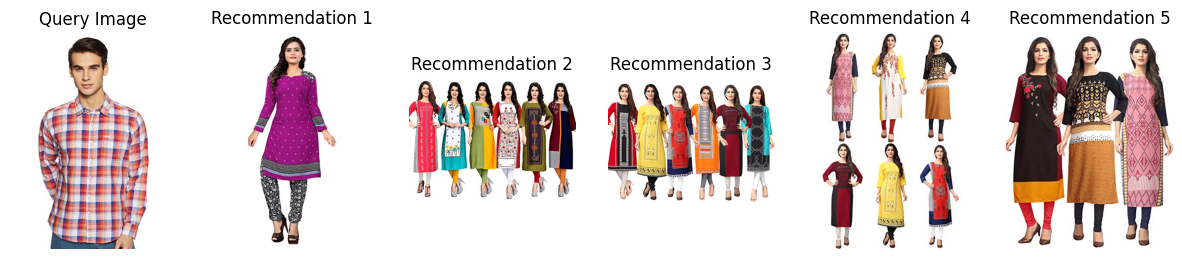


=== Selected Product ===
                            uniq_id  \
7  ab393329c3a9370dc4cc89db35fbcd3a   

                                   product_name brand  
7  pepe jean men solid regular fit casual shirt        

=== Recommended Products ===
                                uniq_id  \
26998  f25aad73997f9f5b8aa325623f158903   
27686  1b8d472ef0565e0b7aaf593adc55642b   
15457  f300d8e59cbd820db12b32fb11541ac9   
5904   98fb5e1936c650d7cce4210d184174d1   
5031   eec8e45d2df086d110ca18dbf431e880   

                                       product_name  
26998         stop fashion women crepe dress materi  
27686           stop fashion women crepe kurta pack  
15457       stop fashion women crepe straight kurta  
5904   stop fashion women crepe straight kurta pack  
5031   stop fashion women crepe straight kurta pack  


In [ ]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO
import requests
# Define product ID and number of recommendations
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'  # Replace with a real uniq_id
num_recommendations = 5  # Number of recommended products

# Check if the product exists in the dataset
if product_id in data['uniq_id'].values:
    # Filter the selected product using the product ID
    selected_product = data[data['uniq_id'] == product_id]

    # Generate product recommendations using the recommend_products function
    recommended_products = recommend_products(product_id, num_recommendations, X_tfidf)  # or X_bow, as required

    # Extract query image and recommended image paths
    query_image_url = selected_product['medium'].values[0]
    recommended_image_urls = recommended_products['medium'].tolist()

    # Visualize query image and recommendations
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(recommended_image_urls) + 1, 1)
    query_image = PILImage.open(requests.get(query_image_url, stream=True).raw)
    plt.imshow(query_image)
    plt.title("Query Image")
    plt.axis('off')

    for i, rec_img_url in enumerate(recommended_image_urls, start=2):
        rec_img = PILImage.open(requests.get(rec_img_url, stream=True).raw)
        plt.subplot(1, len(recommended_image_urls) + 1, i)
        plt.imshow(rec_img)
        plt.title(f"Recommendation {i - 1}")
        plt.axis('off')

    plt.show()

    # Display selected product details
    print("\n=== Selected Product ===")
    print(selected_product[['uniq_id', 'product_name', 'brand']])

    # Display recommended product details
    print("\n=== Recommended Products ===")
    print(recommended_products[['uniq_id', 'product_name']])

else:
    print(f"Product ID {product_id} not found in the dataset.")



=== Selected Product ===
                                       product_name  sales_price  rating
15375  pepe jean men solid regular fit casual shirt        919.0     2.9



=== Recommended Products ===
Product Name: pepe jean men solid regular fit casual shirt
Price: $879.0, Rating: 2.8
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 1.0
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 2.9
------------------------------
Product Name: pepe jean men stripe regular fit casual shirt
Price: $879.0, Rating: 2.7
------------------------------
Product Name: pepe jean men print regular fit casual shirt
Price: $879.0, Rating: 3.4
------------------------------


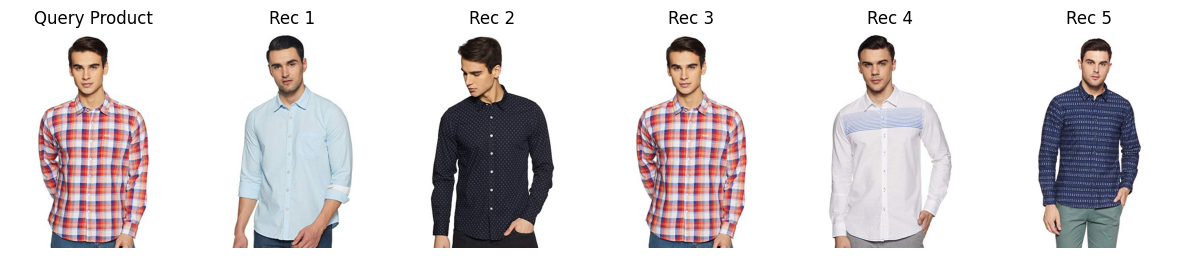

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import requests

# Tokenize product names for Word2Vec
data['product_name_tokens'] = data['product_name'].str.split()

# Train Word2Vec model
model = Word2Vec(
    sentences=data['product_name_tokens'],
    vector_size=100,  # Size of word embeddings
    window=5,         # Context window size
    min_count=1,      # Minimum frequency of words
    workers=4,        # Number of threads
    sg=1              # Use Skip-gram; set to 0 for CBOW
)

# Get average Word2Vec embeddings for each product
def get_product_embeddings(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return sum(vectors) / len(vectors) if vectors else None

# Add product embeddings to the dataset
data['embedding'] = data['product_name_tokens'].apply(lambda tokens: get_product_embeddings(tokens, model))

# Drop products without embeddings
data = data.dropna(subset=['embedding']).reset_index(drop=True)

# Function to recommend products using Word2Vec embeddings
def recommend_products_word2vec(product_id, num_recommendations):
    selected_product = data[data['uniq_id'] == product_id]
    if selected_product.empty:
        return None  # Product ID not found

    selected_embedding = selected_product['embedding'].values[0].reshape(1, -1)
    all_embeddings = data['embedding'].tolist()
    similarities = cosine_similarity(selected_embedding, all_embeddings).flatten()

    # Get indices of the top recommendations (excluding the selected product)
    recommended_indices = similarities.argsort()[-num_recommendations - 1 : -1][::-1]
    return data.iloc[recommended_indices][['uniq_id', 'product_name', 'sales_price', 'rating', 'medium']]

# Define product ID and number of recommendations
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'  # Replace with a real uniq_id
num_recommendations = 5  # Number of recommendations

# Check if the product exists in the dataset
if product_id in data['uniq_id'].values:
    # Display the selected product
    selected_product = data[data['uniq_id'] == product_id]
    print("\n=== Selected Product ===")
    print(selected_product[['product_name', 'sales_price', 'rating']])
    query_image_url = selected_product['medium'].values[0]
    display(Image(url=query_image_url))

    # Generate recommendations using Word2Vec
    recommended_products = recommend_products_word2vec(product_id, num_recommendations)
    if recommended_products is not None:
        # Visualize the query and recommended products
        print("\n=== Recommended Products ===")
        plt.figure(figsize=(15, 5))
        query_image = PILImage.open(requests.get(query_image_url, stream=True).raw)
        plt.subplot(1, len(recommended_products) + 1, 1)
        plt.imshow(query_image)
        plt.title("Query Product")
        plt.axis('off')

        for i, (_, row) in enumerate(recommended_products.iterrows(), start=2):
            rec_image_url = row['medium']
            rec_image = PILImage.open(requests.get(rec_image_url, stream=True).raw)
            plt.subplot(1, len(recommended_products) + 1, i)
            plt.imshow(rec_image)
            plt.title(f"Rec {i - 1}")
            plt.axis('off')

            print(f"Product Name: {row['product_name']}")
            print(f"Price: ${row['sales_price']}, Rating: {row['rating']}")
            print("-" * 30)

        plt.show()
    else:
        print("No recommendations found.")
else:
    print(f"Product ID {product_id} not found in the dataset.")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Selected Product:
                                       product_name  sales_price  rating
15375  pepe jean men solid regular fit casual shirt        919.0     2.9



=== Recommended Products ===
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 2.7
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $879.0, Rating: 2.8
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 1.0
------------------------------
Product Name: pepe jean men stripe regular fit casual shirt
Price: $879.0, Rating: 2.7
------------------------------
Product Name: pepe jean men print regular fit casual shirt
Price: $879.0, Rating: 3.4
------------------------------


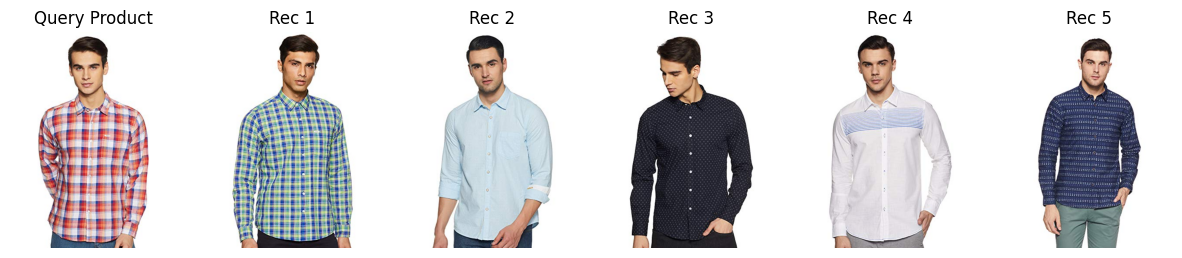

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Tokenize product names for Word2Vec
data['product_name_tokens'] = data['product_name'].str.split()

# Train Word2Vec model
model = Word2Vec(
    sentences=data['product_name_tokens'],
    vector_size=100,  # Size of word embeddings
    window=5,         # Context window size
    min_count=1,      # Minimum frequency of words
    workers=4,        # Number of threads
    sg=1              # Use Skip-gram; set to 0 for CBOW
)

# Train a TF-IDF vectorizer on the product names
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['product_name_tokens'])
tfidf_vocab = tfidf_vectorizer.vocabulary_

# Get TF-IDF-weighted Word2Vec embeddings for each product
def get_tfidf_weighted_embeddings(tokens, model, tfidf_vocab, tfidf_vectorizer, idx):
    vectors = []
    tfidf_scores = tfidf_matrix[idx].toarray()[0]

    for word in tokens:
        if word in model.wv and word in tfidf_vocab:
            weight = tfidf_scores[tfidf_vocab[word]]
            vectors.append(model.wv[word] * weight)

    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return None

# Add TF-IDF-weighted embeddings to the dataset
data['embedding'] = [
    get_tfidf_weighted_embeddings(tokens, model, tfidf_vocab, tfidf_vectorizer, idx)
    for idx, tokens in enumerate(data['product_name_tokens'])
]

# Drop products without embeddings
data = data.dropna(subset=['embedding']).reset_index(drop=True)

# Function to recommend products using TF-IDF Word2Vec embeddings
def recommend_products_tfidf_word2vec(product_id, num_recommendations):
    # Get the embedding of the selected product
    selected_product = data[data['uniq_id'] == product_id]
    if selected_product.empty:
        return None  # Product ID not found

    selected_embedding = selected_product['embedding'].values[0].reshape(1, -1)

    # Compute cosine similarity with all products
    all_embeddings = data['embedding'].tolist()
    similarities = cosine_similarity(selected_embedding, all_embeddings).flatten()

    # Get indices of the top recommendations (excluding the selected product)
    recommended_indices = similarities.argsort()[-num_recommendations - 1 : -1][::-1]

    # Return the recommended products
    return data.iloc[recommended_indices][['uniq_id', 'product_name', 'sales_price', 'rating', 'medium']]

# Define product ID and number of recommendations
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'  # Replace with a real uniq_id
num_recommendations = 5  # Number of recommendations

# Check if the product exists in the dataset
if product_id in data['uniq_id'].values:
    # Display the selected product
    selected_product = data[data['uniq_id'] == product_id]
    print("Selected Product:")
    selected_product_image_url = selected_product['medium'].values[0]
    print(selected_product[['product_name', 'sales_price', 'rating']])
    display(Image(url=selected_product_image_url))

    # Generate recommendations using TF-IDF Word2Vec
    recommended_products = recommend_products_tfidf_word2vec(product_id, num_recommendations)
    if recommended_products is not None:
      # Visualize the query and recommended products
      print("\n=== Recommended Products ===")
      plt.figure(figsize=(15, 5))
      query_image = PILImage.open(requests.get(query_image_url, stream=True).raw)
      plt.subplot(1, len(recommended_products) + 1, 1)
      plt.imshow(query_image)
      plt.title("Query Product")
      plt.axis('off')

      for i, (_, row) in enumerate(recommended_products.iterrows(), start=2):
          rec_image_url = row['medium']
          rec_image = PILImage.open(requests.get(rec_image_url, stream=True).raw)
          plt.subplot(1, len(recommended_products) + 1, i)
          plt.imshow(rec_image)
          plt.title(f"Rec {i - 1}")
          plt.axis('off')

          print(f"Product Name: {row['product_name']}")
          print(f"Price: ${row['sales_price']}, Rating: {row['rating']}")
          print("-" * 30)

      plt.show()
    else:
      print("No recommendations found.")
else:
    print(f"Product ID {product_id} not found in the dataset.")


Selected Product:
                                       product_name  sales_price  rating brand
15375  pepe jean men solid regular fit casual shirt        919.0     2.9      



=== Recommended Products ===
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 2.9
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $879.0, Rating: 2.8
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 1.0
------------------------------
Product Name: pepe jean men stripe regular fit casual shirt
Price: $879.0, Rating: 2.7
------------------------------
Product Name: pepe jean men print regular fit casual shirt
Price: $879.0, Rating: 3.4
------------------------------


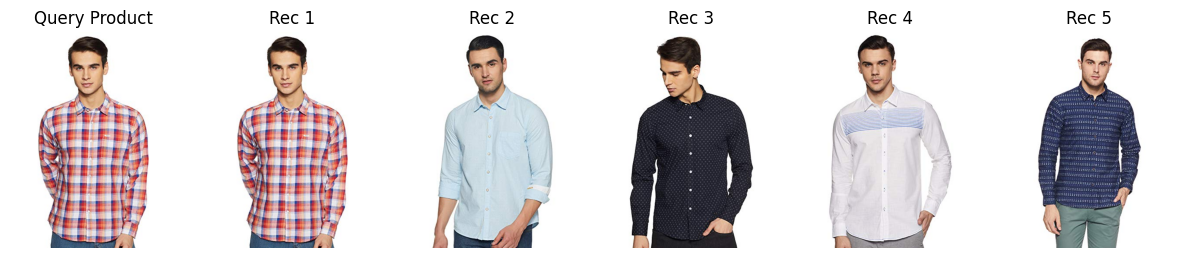

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Function to recommend products using brand-based filtering with TF-IDF Word2Vec embeddings
def recommend_products_by_brand_tfidf_word2vec(product_id, num_recommendations):
    # Get the selected product
    selected_product = data[data['uniq_id'] == product_id]
    if selected_product.empty:
        return None  # Product ID not found

    selected_brand = selected_product['brand'].values[0]
    selected_embedding = selected_product['embedding'].values[0].reshape(1, -1)

    # Filter dataset for products of the same brand
    same_brand_products = data[data['brand'] == selected_brand].reset_index(drop=True)

    # If fewer than `num_recommendations` exist, adjust limit
    if len(same_brand_products) <= num_recommendations:
        return same_brand_products[['uniq_id', 'product_name', 'sales_price', 'rating', 'medium']]

    # Extract embeddings for products of the same brand
    same_brand_embeddings = same_brand_products['embedding'].tolist()

    # Compute cosine similarity within the same brand
    similarities = cosine_similarity(selected_embedding, same_brand_embeddings).flatten()

    # Get indices of the top recommendations (excluding the selected product)
    recommended_indices = similarities.argsort()[-num_recommendations - 1 : -1][::-1]

    # Return the recommended products
    return same_brand_products.iloc[recommended_indices][['uniq_id', 'product_name', 'sales_price', 'rating', 'medium']]

# Example Usage
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'  # Replace with real uniq_id
num_recommendations = 5  # Number of recommendations

if product_id in data['uniq_id'].values:
    # Display the selected product
    selected_product = data[data['uniq_id'] == product_id]
    print("Selected Product:")
    selected_product_image_url = selected_product['medium'].values[0]
    print(selected_product[['product_name', 'sales_price', 'rating', 'brand']])
    display(Image(url=selected_product_image_url))

    # Generate brand-based recommendations using TF-IDF Word2Vec
    recommended_products = recommend_products_by_brand_tfidf_word2vec(product_id, num_recommendations)
    if recommended_products is not None:
        # Visualize the query and recommended products
        print("\n=== Recommended Products ===")
        plt.figure(figsize=(15, 5))
        query_image = PILImage.open(requests.get(query_image_url, stream=True).raw)
        plt.subplot(1, len(recommended_products) + 1, 1)
        plt.imshow(query_image)
        plt.title("Query Product")
        plt.axis('off')

        for i, (_, row) in enumerate(recommended_products.iterrows(), start=2):
            rec_image_url = row['medium']
            rec_image = PILImage.open(requests.get(rec_image_url, stream=True).raw)
            plt.subplot(1, len(recommended_products) + 1, i)
            plt.imshow(rec_image)
            plt.title(f"Rec {i - 1}")
            plt.axis('off')

            print(f"Product Name: {row['product_name']}")
            print(f"Price: ${row['sales_price']}, Rating: {row['rating']}")
            print("-" * 30)

        plt.show()
    else:
        print("No recommendations found.")
else:
    print(f"Product ID {product_id} not found in the dataset.")


In [ ]:
import requests
from io import BytesIO
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image  # For displaying images in notebooks
import gc  # For garbage collection

# Filter invalid rows
data = data.iloc[:10000].reset_index(drop=True)
data = data[data['medium'].apply(lambda x: isinstance(x, str))].reset_index(drop=True)

# Initialize the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to fetch and preprocess image from URL
def extract_image_embedding_from_url(image_url):
    try:
        # Fetch the image from the URL
        response = requests.get(image_url)
        response.raise_for_status()  # Ensure the request was successful

        # Open the image and preprocess
        img = load_img(BytesIO(response.content), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the ResNet model
        embedding = resnet_model.predict(img_array)
        return embedding.flatten()
    except Exception as e:
        print(f"Error processing image URL {image_url}: {e}")
        return None

# Function to process data in batches of 1000 rows
def process_batches(data, batch_size=10000, model_save_path="resnet_model_checkpoint"):
    total_rows = len(data)
    for start in range(0, total_rows, batch_size):
        end = min(start + batch_size, total_rows)
        batch = data.iloc[start:end]

        print(f"Processing rows {start} to {end}...")

        # Extract embeddings for the current batch
        batch['image_embedding'] = batch['medium'].apply(lambda x: extract_image_embedding_from_url(x.split('|')[0]))

        # Drop rows where embeddings couldn't be extracted
        batch = batch.dropna(subset=['image_embedding']).reset_index(drop=True)

        # Update the main dataset with processed batch
        data.loc[start:end-1, 'image_embedding'] = batch['image_embedding']

        # Save the model as a checkpoint
        resnet_model.save(f"{model_save_path}_rows_{start}_to_{end}.h5")
        print(f"Model checkpoint saved for rows {start} to {end}.")

        # Clear memory
        del batch
        gc.collect()
        print("Memory cleared.")

    return data

# Precompute embeddings in batches
data = process_batches(data)

# Drop rows where image embeddings couldn't be extracted (final clean-up)
data = data.dropna(subset=['image_embedding']).reset_index(drop=True)

# Function to recommend products based on image similarity
def recommend_products_by_image(product_id, num_recommendations):
    selected_product = data[data['uniq_id'] == product_id]
    if selected_product.empty:
        return None  # Product ID not found

    selected_embedding = selected_product['image_embedding'].values[0].reshape(1, -1)
    all_embeddings = np.vstack(data['image_embedding'].values)
    similarities = cosine_similarity(selected_embedding, all_embeddings).flatten()
    recommended_indices = similarities.argsort()[-num_recommendations - 1 : -1][::-1]

    return data.iloc[recommended_indices][['uniq_id', 'product_name', 'sales_price', 'rating', 'medium']]





Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'
num_recommendations = 5

if product_id in data['uniq_id'].values:
    selected_product = data[data['uniq_id'] == product_id]
    print("Selected Product:")
    selected_product_image_url = selected_product['medium'].values[0].split('|')[0]
    print(selected_product[['product_name', 'sales_price', 'rating']])
    display(Image.open(BytesIO(requests.get(selected_product_image_url).content)))

    recommended_products = recommend_products_by_image(product_id, num_recommendations)
    if recommended_products is not None:
        print("\nRecommended Products:")
        for _, row in recommended_products.iterrows():
            print(f"{row['product_name']} - ${row['sales_price']} - Rating: {row['rating']}")
            recommended_image_url = row['medium'].split('|')[0]
            display(Image.open(BytesIO(requests.get(recommended_image_url).content)))
    else:
        print("No recommendations found.")
else:
    print(f"Product ID {product_id} not found in the dataset.")

Selected Product:
                                       product_name  sales_price  rating
15375  pepe jean men solid regular fit casual shirt        919.0     2.9


AttributeError: type object 'Image' has no attribute 'open'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Function to recommend products using brand and TF-IDF Word2Vec embeddings
def recommend_products_by_brand_tfidf_word2vec(product_id, num_recommendations):
    # Get the selected product
    selected_product = data[data['uniq_id'] == product_id]
    if selected_product.empty:
        return None  # Product ID not found

    selected_brand = selected_product['brand'].values[0]
    selected_embedding = selected_product['embedding'].values[0].reshape(1, -1)

    # Filter dataset for products of the same brand
    same_brand_products = data[data['brand'] == selected_brand].reset_index(drop=True)

    # Extract embeddings for products of the same brand
    same_brand_embeddings = same_brand_products['embedding'].tolist()

    # Compute cosine similarity within the same brand
    similarities = cosine_similarity(selected_embedding, same_brand_embeddings).flatten()

    # Add similarity scores to the dataframe
    same_brand_products['similarity'] = similarities

    # Sort products by similarity in descending order
    sorted_products = same_brand_products.sort_values(by='similarity', ascending=False)

    # Exclude the selected product and get the top recommendations
    top_recommendations = sorted_products[sorted_products['uniq_id'] != product_id].head(num_recommendations)

    # Return the recommended products
    return top_recommendations[['uniq_id', 'product_name', 'brand', 'sales_price', 'rating', 'medium', 'similarity']]


Selected Product:


Product Name: pepe jean men solid regular fit casual shirt
Brand: 
Price: $919.00
Rating: 2.9

=== Recommended Products ===
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 2.9
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $879.0, Rating: 2.8
------------------------------
Product Name: pepe jean men solid regular fit casual shirt
Price: $919.0, Rating: 1.0
------------------------------
Product Name: pepe jean men stripe regular fit casual shirt
Price: $879.0, Rating: 2.7
------------------------------
Product Name: pepe jean men print regular fit casual shirt
Price: $879.0, Rating: 3.4
------------------------------


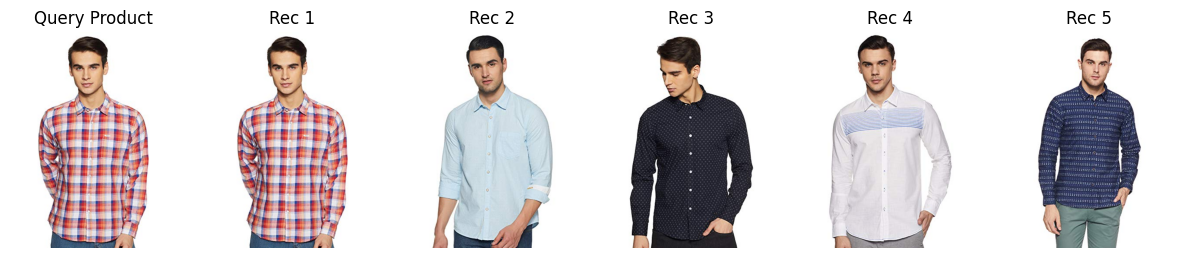

In [ ]:

# Example Usage
product_id = 'ab393329c3a9370dc4cc89db35fbcd3a'  # Replace with real uniq_id
num_recommendations = 5  # Number of recommendations

if product_id in data['uniq_id'].values:
    # Display the selected product
    selected_product = data[data['uniq_id'] == product_id]
    print("Selected Product:")
    selected_product_image_url = selected_product['medium'].values[0]
    display(Image(url=selected_product_image_url, width=200))
    print(f"Product Name: {selected_product['product_name'].values[0]}")
    print(f"Brand: {selected_product['brand'].values[0]}")
    print(f"Price: ${selected_product['sales_price'].values[0]:,.2f}")
    print(f"Rating: {selected_product['rating'].values[0]:.1f}")

    # Generate brand-based recommendations using TF-IDF Word2Vec
    recommended_products = recommend_products_by_brand_tfidf_word2vec(product_id, num_recommendations)
    if recommended_products is not None:
      # Visualize the query and recommended products
      print("\n=== Recommended Products ===")
      plt.figure(figsize=(15, 5))
      query_image = PILImage.open(requests.get(query_image_url, stream=True).raw)
      plt.subplot(1, len(recommended_products) + 1, 1)
      plt.imshow(query_image)
      plt.title("Query Product")
      plt.axis('off')

      for i, (_, row) in enumerate(recommended_products.iterrows(), start=2):
          rec_image_url = row['medium']
          rec_image = PILImage.open(requests.get(rec_image_url, stream=True).raw)
          plt.subplot(1, len(recommended_products) + 1, i)
          plt.imshow(rec_image)
          plt.title(f"Rec {i - 1}")
          plt.axis('off')

          print(f"Product Name: {row['product_name']}")
          print(f"Price: ${row['sales_price']}, Rating: {row['rating']}")
          print("-" * 30)

      plt.show()
    else:
      print("No recommendations found.")
else:
    print(f"Product ID {product_id} not found in the dataset.")
